# Fix PDF Python Code

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from pdf2image import convert_from_path
import os
from PIL import Image
from fpdf import FPDF
%matplotlib inline

In [2]:
pages = convert_from_path('./input.pdf', 175)

In [3]:
type(pages[1])

PIL.PpmImagePlugin.PpmImageFile

In [4]:
pages[1].size

(1488, 1925)

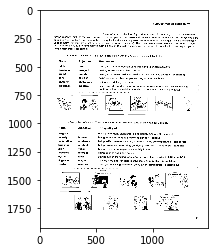

In [5]:
cv2_image = cv2.cvtColor(np.array(pages[2]), cv2.COLOR_RGB2GRAY)
plt.imshow(cv2_image, 'gray')

In [6]:
def show_pic(img):
    fig = plt.figure(figsize=(30,30))
    ax = fig.add_subplot(111)
    ax.imshow(img,cmap='gray')

In [7]:
print('Max value is',cv2_image.max())
print('Min value is',cv2_image.min())

Max value is 255
Min value is 0


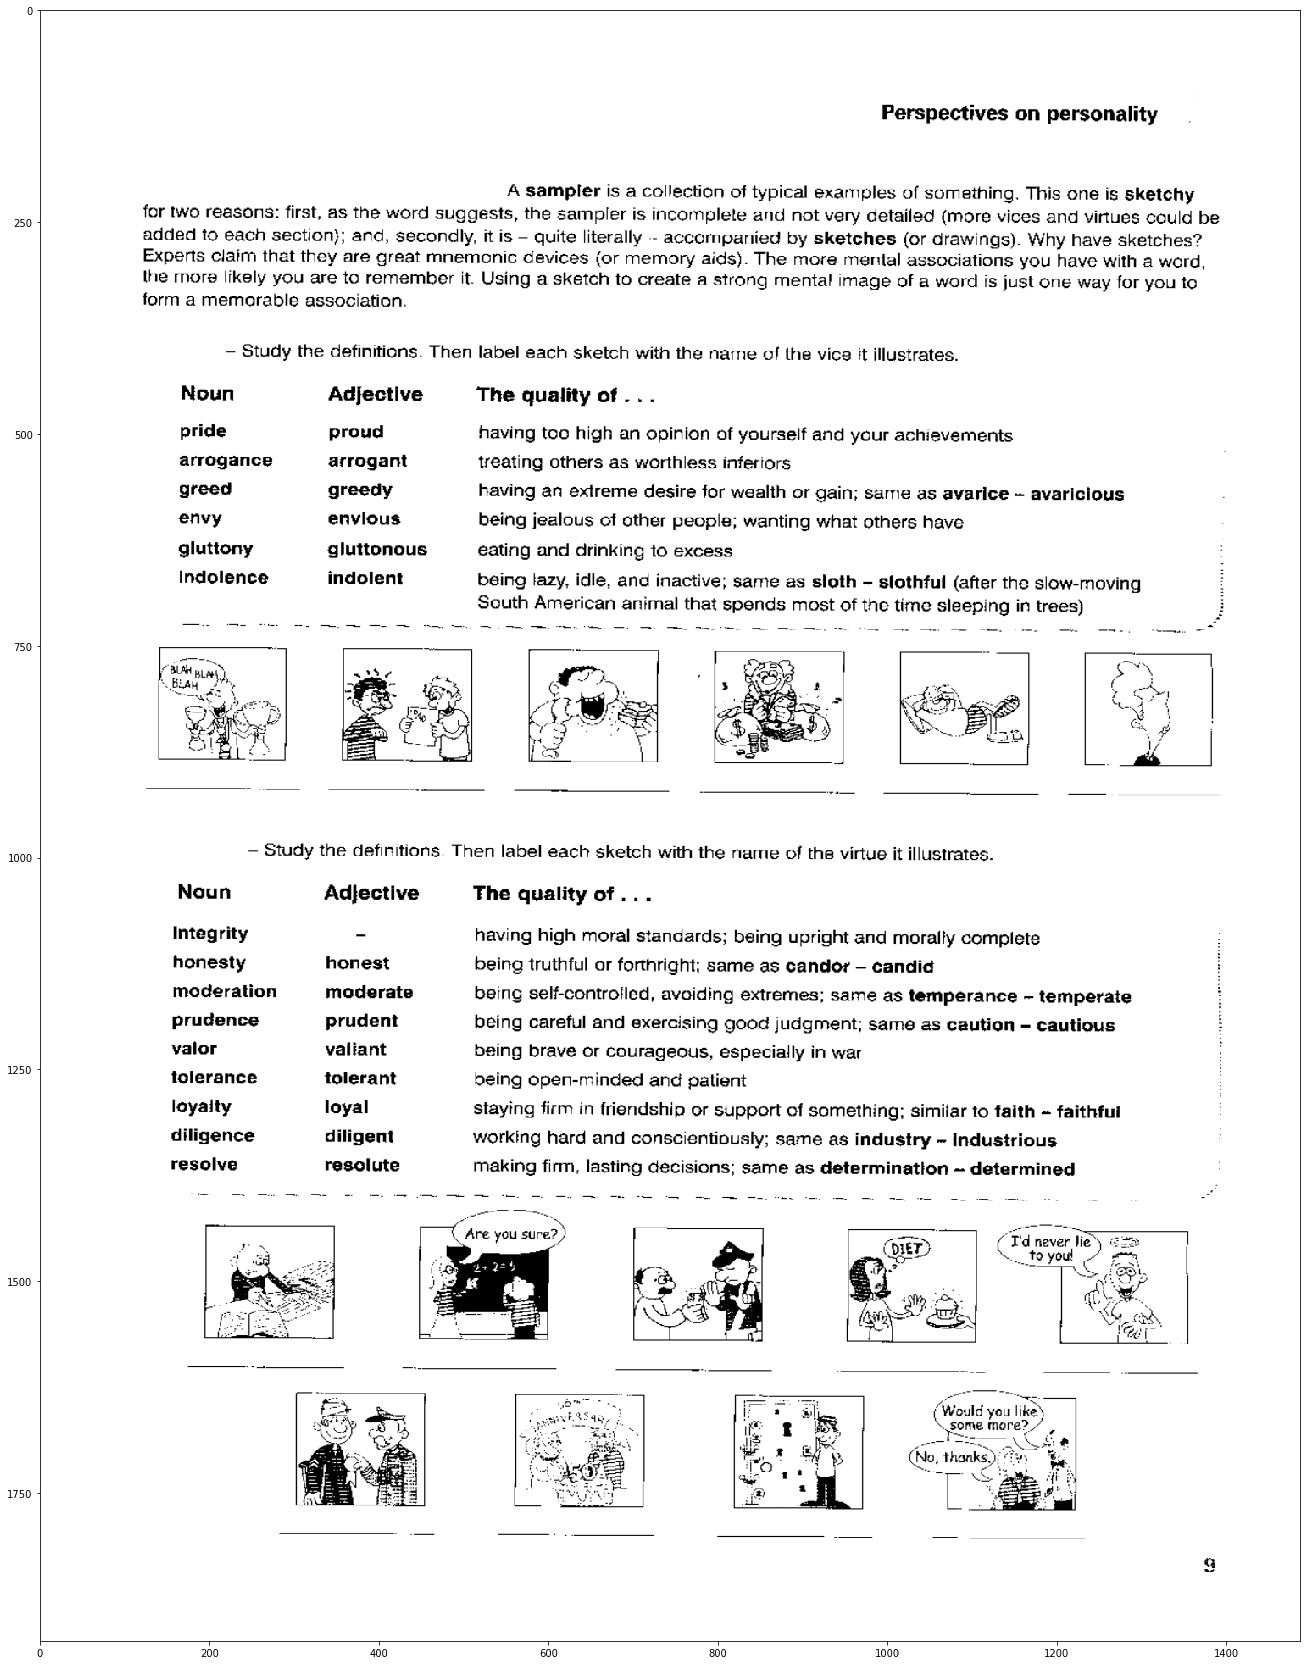

In [8]:
show_pic(pages[2])

## We will follow the pattern:
* Inverse the image
* Apply Opening to remove noise
* Inverse again

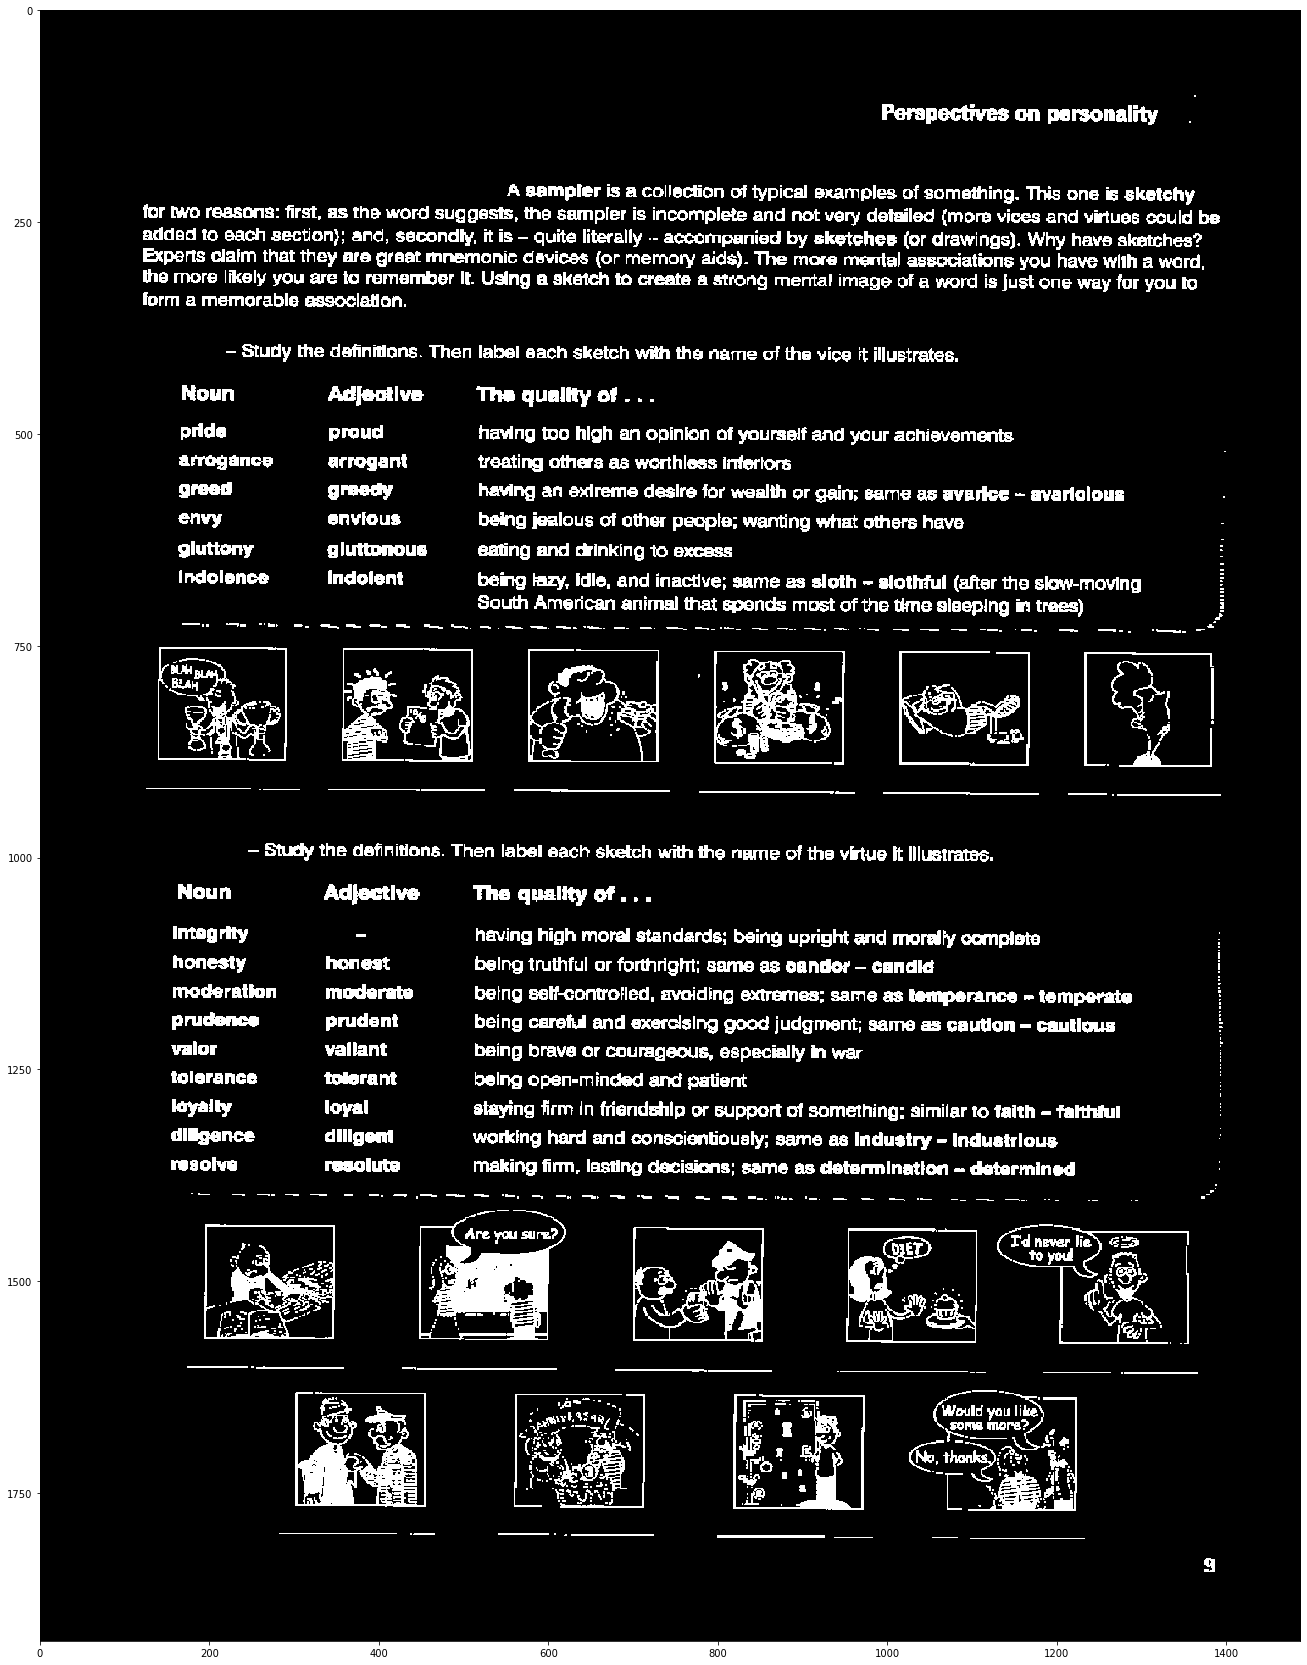

In [20]:
ret,thresh = cv2.threshold(cv2_image,250,255,cv2.THRESH_BINARY_INV)
show_pic(thresh)

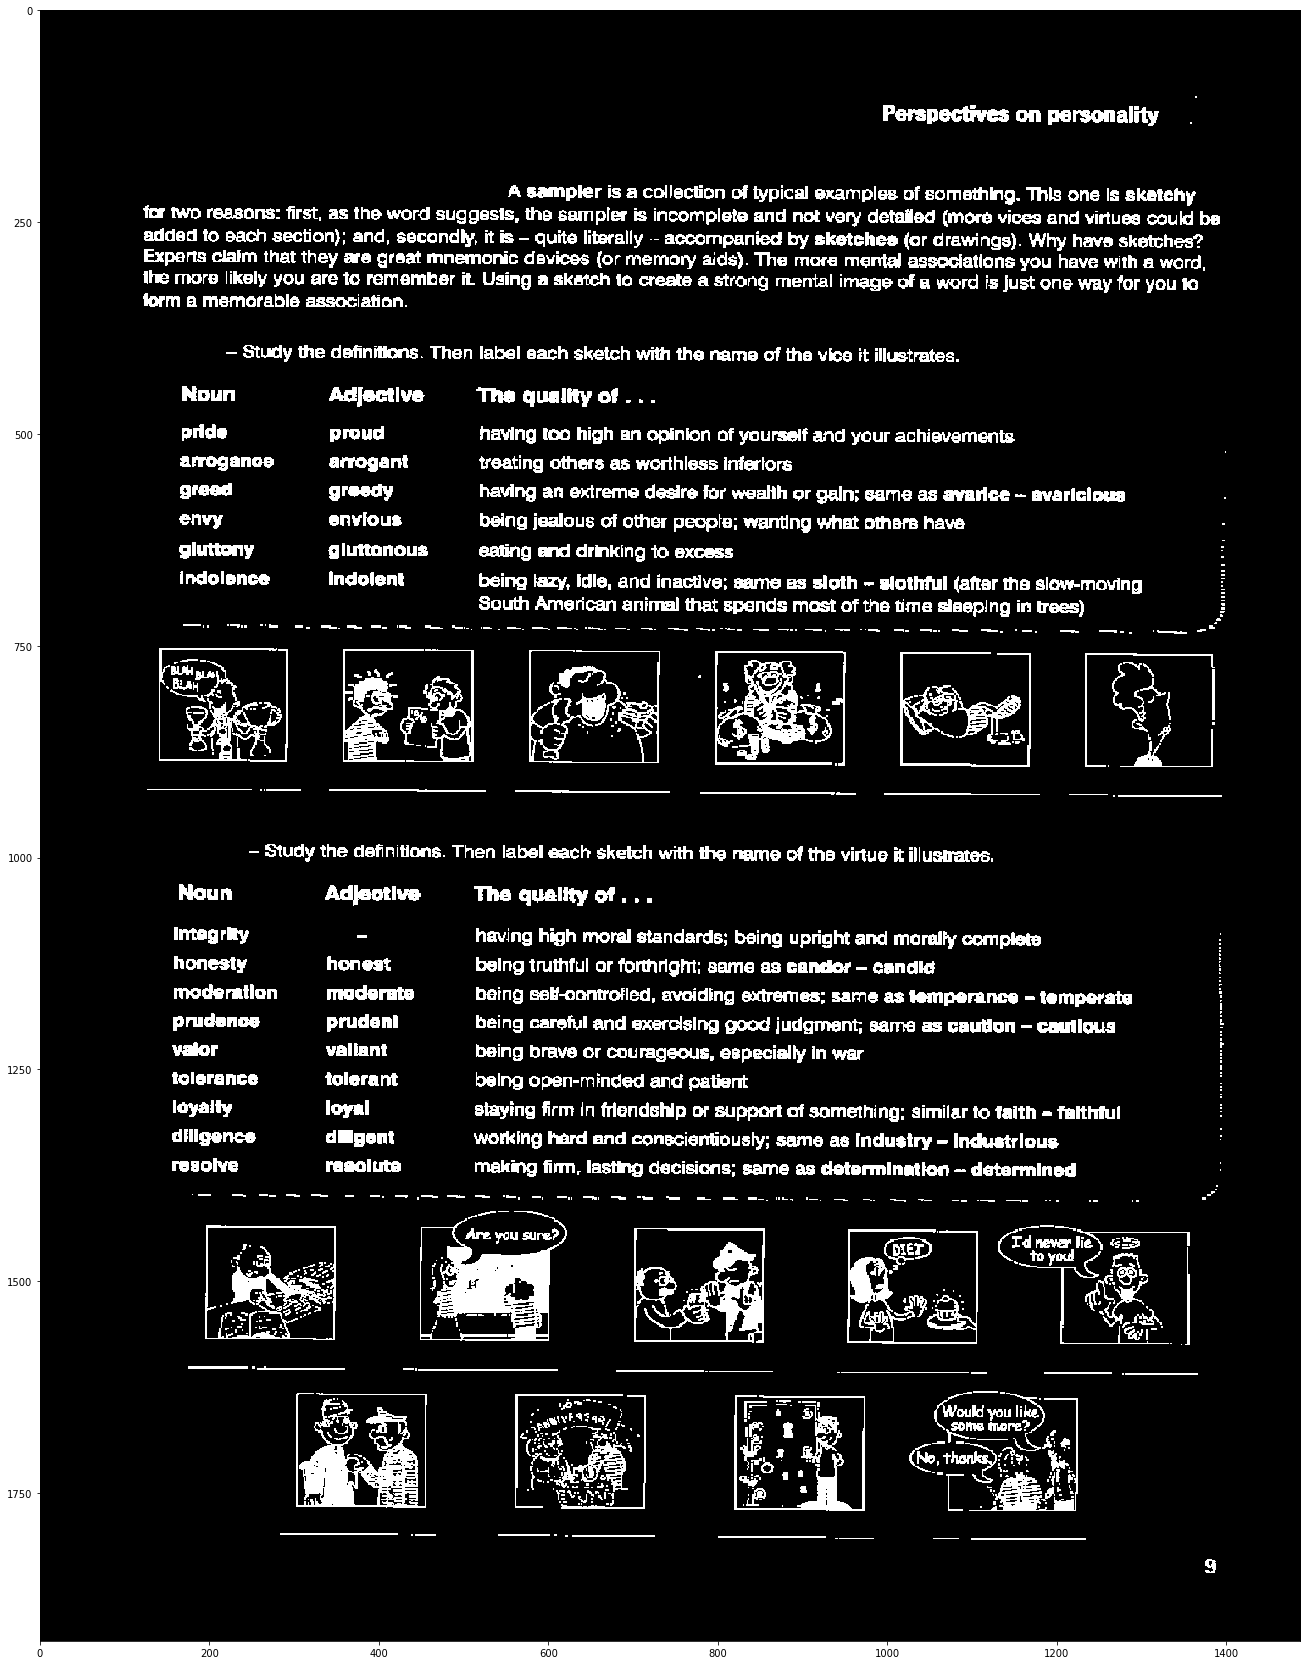

In [21]:
kernerO = np.ones((2,2))
opening = cv2.morphologyEx(thresh, cv2.MORPH_OPEN, kernerO)
show_pic(opening)

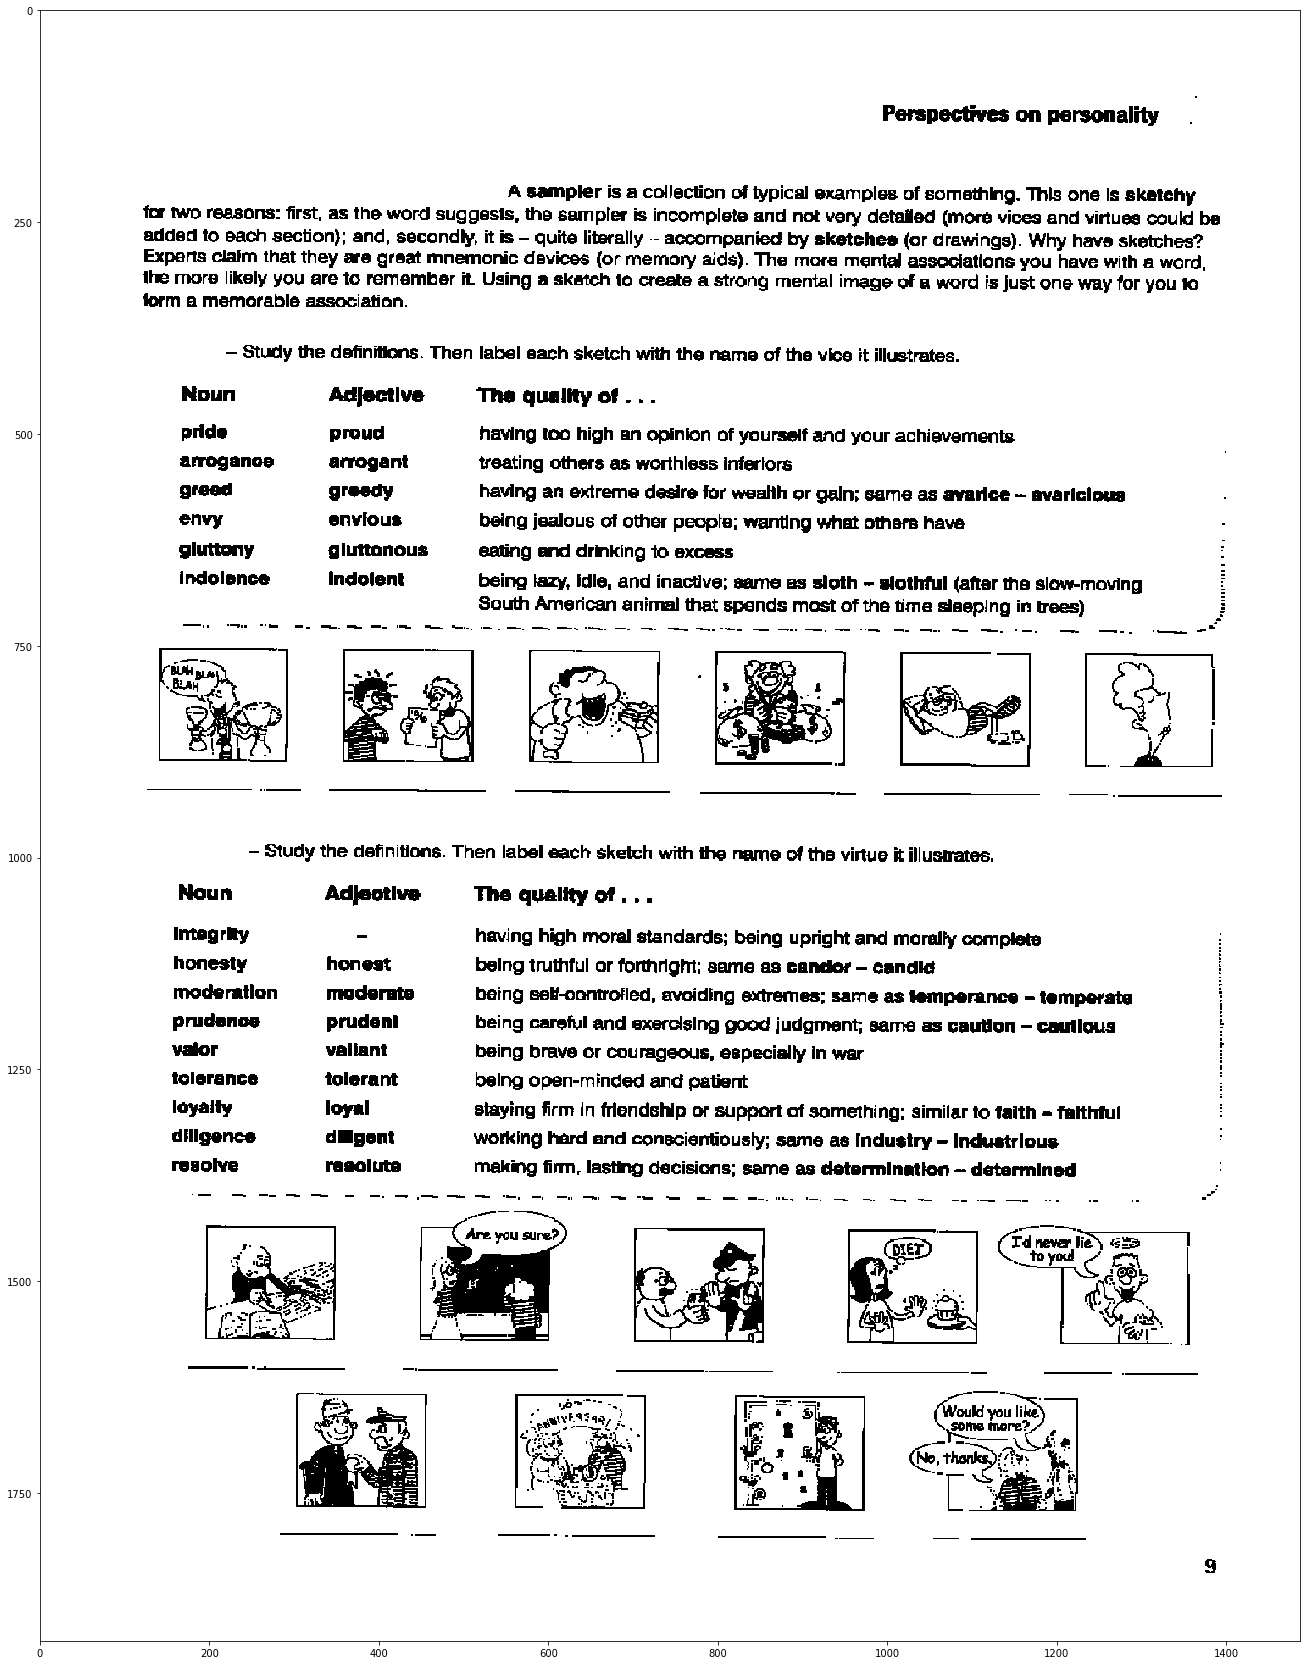

In [22]:
ret,thresh2 = cv2.threshold(opening,0,255,cv2.THRESH_BINARY_INV)
show_pic(thresh2)

In [23]:
print('Open cv2 image gives',thresh.shape)
print('Main image gives',pages[1].size)
print('So its reverse',thresh.shape[1],thresh.shape[0])

Open cv2 image gives (1925, 1488)
Main image gives (1488, 1925)
So its reverse 1488 1925


## Time to make a for loop and save all the pages

In [36]:
if not os.path.exists('Images'):
    os.makedirs('Images')

In [37]:
print('There are',len(pages),'pages in ths PDF')
path = './Images/'

There are 175 pages in ths PDF


In [41]:
files = []

In [42]:
for i in range(0,len(pages)):
    cv2_image = cv2.cvtColor(np.array(pages[i]), cv2.COLOR_RGB2GRAY)
    ret,thresh = cv2.threshold(cv2_image,250,255,cv2.THRESH_BINARY_INV)
    kernerO = np.ones((2,2))
    opening = cv2.morphologyEx(thresh, cv2.MORPH_OPEN, kernerO)
    ret,thresh2 = cv2.threshold(opening,0,255,cv2.THRESH_BINARY_INV)
    cv2.imwrite(os.path.join(path ,str(i)+'.jpg'), thresh2)
    files.append('./Images/'+str(i)+'.jpg')

In [43]:
pdf = FPDF()
files[0:10]

['./Images/0.jpg',
 './Images/1.jpg',
 './Images/2.jpg',
 './Images/3.jpg',
 './Images/4.jpg',
 './Images/5.jpg',
 './Images/6.jpg',
 './Images/7.jpg',
 './Images/8.jpg',
 './Images/9.jpg']

In [44]:
# imagelist is the list with all image filenames
for image in files:
    cover  = Image.open(image)
    width, height = cover.size
    
    # convert pixel in mm with 1px=0.264583 mm
    width, height = float(width * 0.264583), float(height * 0.264583)
    
    # given we are working with A4 format size 
    pdf_size = {'P': {'w': 210, 'h': 297}, 'L': {'w': 297, 'h': 210}}
    
    # get page orientation from image size 
    orientation = 'P' if width < height else 'L'
    
    #  make sure image size is not greater than the pdf format size
    width = width if width < pdf_size[orientation]['w'] else pdf_size[orientation]['w']
    height = height if height < pdf_size[orientation]['h'] else pdf_size[orientation]['h']
    
    pdf.add_page(orientation=orientation)
    pdf.image(image, 0, 0, width, height)

pdf.output("Fixed.pdf", "F")

''

# Good Work